In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

Carga del archivo Kaggle .csv

In [3]:
os.environ['KAGGLE_CONFIG_DIR'] = '.'
!chmod 600 ./kaggle.json
!kaggle competitions download -c udea-ai4eng-20242

 99% 20.0M/20.1M [00:01<00:00, 24.6MB/s]
100% 20.1M/20.1M [00:01<00:00, 14.2MB/s]


In [4]:
! pip install opendatasets
import opendatasets as od
od.download("https://www.kaggle.com/competitions/udea-ai4eng-20242/data?select=train.csv")

100%|██████████| 20.1M/20.1M [00:01<00:00, 13.9MB/s]



Extracting archive ./udea-ai4eng-20242/udea-ai4eng-20242.zip to ./udea-ai4eng-20242


In [6]:
!unzip /content/udea-ai4eng-20242.zip

Archive:  /content/udea-ai4eng-20242.zip
  inflating: submission_example.csv  
  inflating: test.csv                
replace train.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: r
new name: train.csv
replace train.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


Veré el contenido del train.csv

In [8]:
datos = pd.read_csv("/content/train.csv")
datos.head()

,ID,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,ESTU_PAGOMATRICULAPROPIO,RENDIMIENTO_GLOBAL
0,904256,20212,ENFERMERIA,BOGOTÁ,Entre 5.5 millones y menos de 7 millones,Menos de 10 horas,Estrato 3,Si,Técnica o tecnológica incompleta,Postgrado,No,medio-alto
1,645256,20212,DERECHO,ATLANTICO,Entre 2.5 millones y menos de 4 millones,0,Estrato 3,No,Técnica o tecnológica completa,Técnica o tecnológica incompleta,No,bajo
2,308367,20203,MERCADEO Y PUBLICIDAD,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) completa,No,bajo
3,470353,20195,ADMINISTRACION DE EMPRESAS,SANTANDER,Entre 4 millones y menos de 5.5 millones,0,Estrato 4,Si,No sabe,Secundaria (Bachillerato) completa,No,alto
4,989032,20212,PSICOLOGIA,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 3,Si,Primaria completa,Primaria completa,No,medio-bajo


La forma del dataFrame

In [9]:
print ("shape of loaded dataframe", datos.shape)

shape of loaded dataframe (578221, 12)


Puedo escoger solo ciertas columnas para manejar

In [10]:
colum = datos[['ESTU_PRGM_ACADEMICO', 'FAMI_ESTRATOVIVIENDA', 'RENDIMIENTO_GLOBAL']]
colum.head()

,ESTU_PRGM_ACADEMICO,FAMI_ESTRATOVIVIENDA,RENDIMIENTO_GLOBAL
0,ENFERMERIA,Estrato 3,medio-alto
1,DERECHO,Estrato 3,bajo
2,MERCADEO Y PUBLICIDAD,Estrato 3,bajo
3,ADMINISTRACION DE EMPRESAS,Estrato 4,alto
4,PSICOLOGIA,Estrato 3,medio-bajo


Veo la información de los datos

In [11]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 578221 entries, 0 to 578220
Data columns (total 12 columns):
 #   Column                          Non-Null Count   Dtype 
---  ------                          --------------   ----- 
 0   ID                              578221 non-null  int64 
 1   PERIODO                         578221 non-null  int64 
 2   ESTU_PRGM_ACADEMICO             578221 non-null  object
 3   ESTU_PRGM_DEPARTAMENTO          578221 non-null  object
 4   ESTU_VALORMATRICULAUNIVERSIDAD  573007 non-null  object
 5   ESTU_HORASSEMANATRABAJA         552497 non-null  object
 6   FAMI_ESTRATOVIVIENDA            551470 non-null  object
 7   FAMI_TIENEINTERNET              556088 non-null  object
 8   FAMI_EDUCACIONPADRE             558943 non-null  object
 9   FAMI_EDUCACIONMADRE             558552 non-null  object
 10  ESTU_PAGOMATRICULAPROPIO        572817 non-null  object
 11  RENDIMIENTO_GLOBAL              578220 non-null  object
dtypes: int64(2), object(10)
memory

In [12]:
datos.describe()

,ID,PERIODO
count,578221.000000,578221.000000
mean,494820.839632,20198.366420
std,285468.310677,10.533979
min,1.000000,20183.000000
25%,247957.000000,20195.000000
50%,494864.000000,20195.000000
75%,741726.000000,20203.000000
max,989283.000000,20213.000000


Gráfico la información para tener una mejor visualización de los datos

<Axes: xlabel='RENDIMIENTO_GLOBAL'>

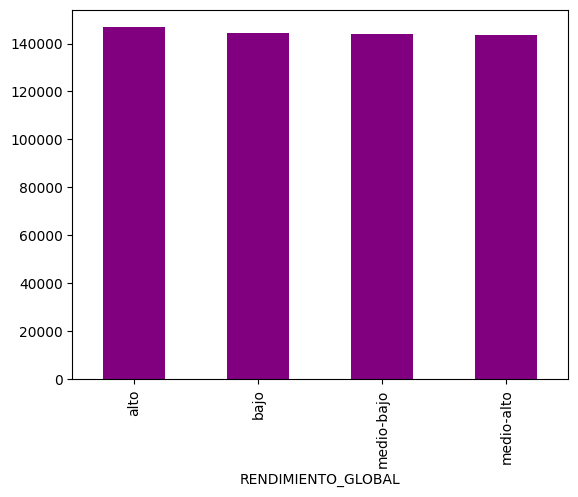

In [30]:
datos.RENDIMIENTO_GLOBAL.value_counts().plot(kind='bar', color = "purple")

<Axes: xlabel='FAMI_EDUCACIONMADRE'>

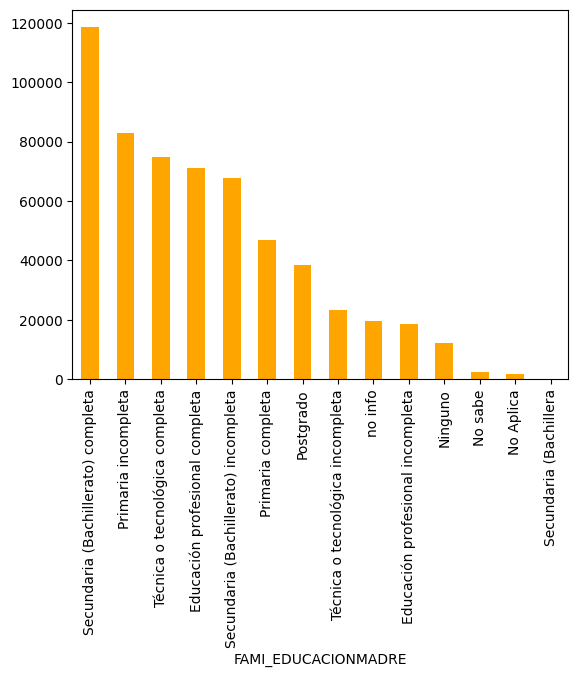

In [33]:
datos.FAMI_EDUCACIONMADRE.value_counts().plot(kind='bar', color = "orange")

<Axes: xlabel='ESTU_VALORMATRICULAUNIVERSIDAD'>

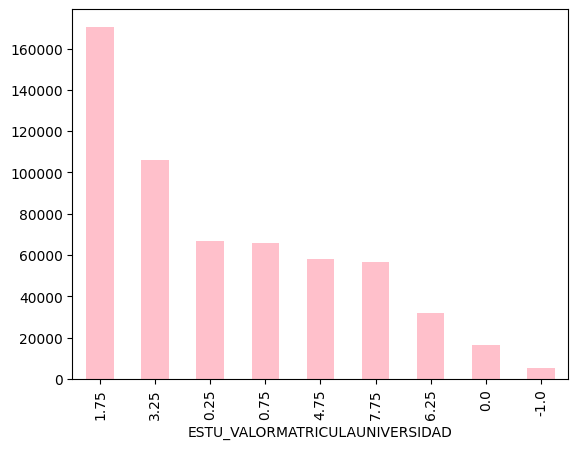

In [32]:
datos.ESTU_VALORMATRICULAUNIVERSIDAD.value_counts().plot(kind='bar', color = "pink")

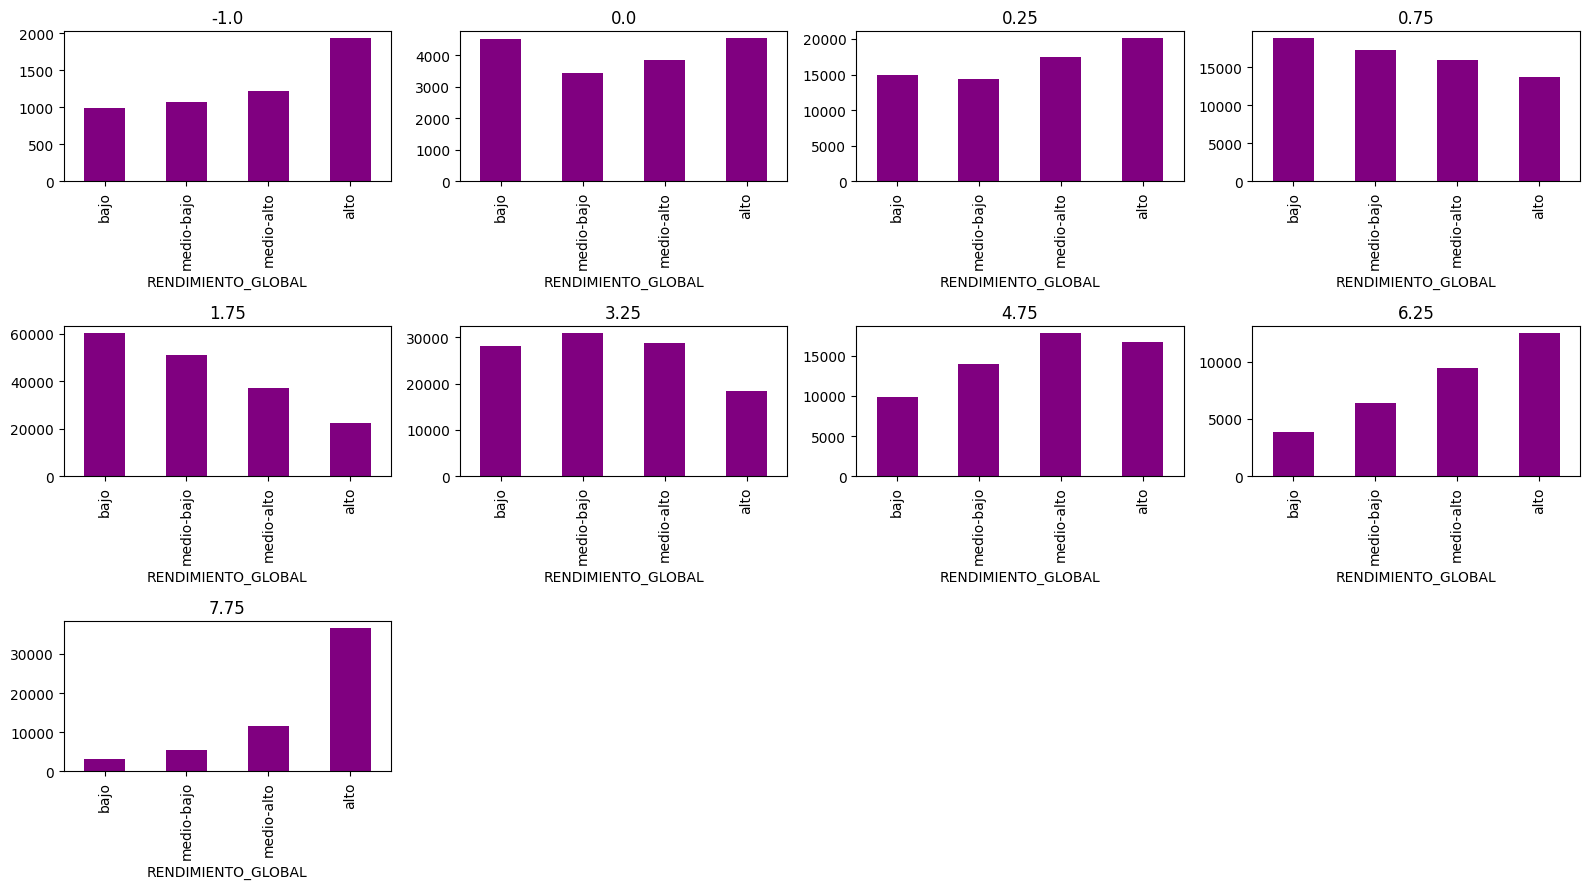

In [36]:
!pip install rlxutils

from rlxutils import subplots
import matplotlib.pyplot as plt

c = sorted(datos.ESTU_VALORMATRICULAUNIVERSIDAD.value_counts().index)
for ax,ci in subplots(c, n_cols=4, usizex=4):
    d = datos[datos.ESTU_VALORMATRICULAUNIVERSIDAD==ci]
    d.RENDIMIENTO_GLOBAL.value_counts()[['bajo', 'medio-bajo', 'medio-alto', 'alto']].plot(kind='bar', color = "purple")
    plt.title(ci)